In [8]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

try:
    if path:
        raise Exception('changed')
except:
    path = True
    sys.path.append('../')

from src.data_generator import generate_data
from src.clustering import OrdinalClustering, univariate_em, compute_loglikelihood, compute_p_list

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## BOS Distribution

[2 3 2 4 3 2 2 2 2 2 4 2 3 2 3 3 2 2 2 3 2 2 3 2 2 3 1 2 2 1 3 3 2 2 2 1 3
 2 2 1 2 4 1 2 4 4 2 4 2 2 2 1 2 3 2 4 4 2 4 2 2 2 2 3 2 2 2 3 2 2 4 2 1 4
 2 2 3 2 2 2 2 1 1 2 4 2 2 2 2 3 3 1 2 1 2 1 3 3 2 4]
True mu: 2, True pi: 0.5869558270790532


100%|██████████| 4/4 [00:23<00:00,  5.87s/it]

Estimated mu: 2, Estimated pi: 0.47395059084506813


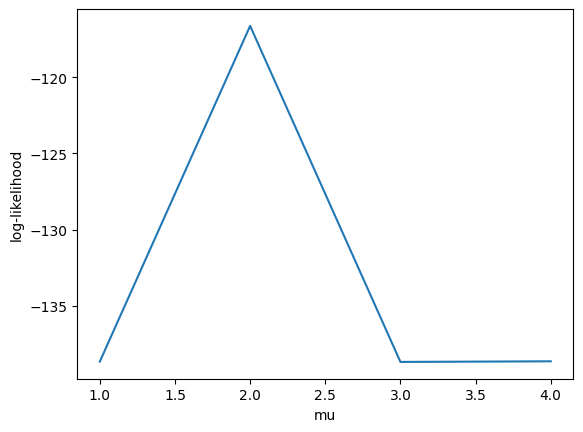

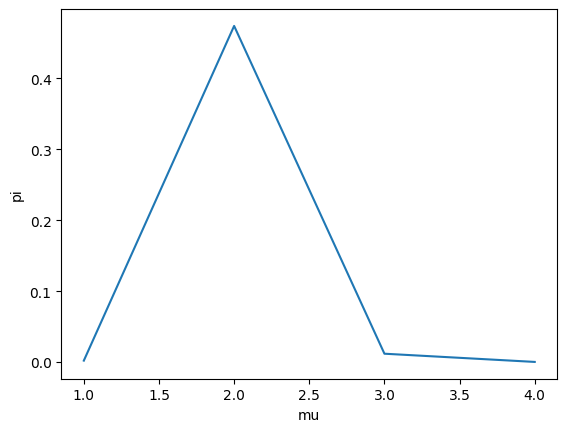

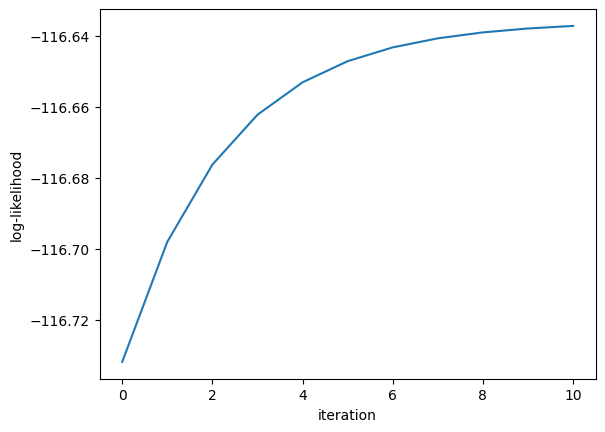

In [2]:
#Univariate
n = 100
m = 4
n_iter = 100
eps = 1e-3

true_mu = np.random.randint(1, m + 1)
true_pi = np.random.random()

data = generate_data(n, 1, [m], 1, [1], [[true_mu]], [[true_pi]], 0)[
    0
].flatten()
print(data)

print("True mu: {}, True pi: {}".format(true_mu, true_pi))

all_lls = []
ll_list = []
pi_list = []
mu_list = list(range(1, m + 1))
for mu in tqdm(mu_list):
    pl, lls, p_tots = univariate_em(data, m, mu, n_iter, eps)
    pi_list.append(pl[-1])
    ll_list.append(compute_loglikelihood(data, p_tots))
    all_lls.append(lls)

print(
    "Estimated mu: {}, Estimated pi: {}".format(
        mu_list[np.argmax(ll_list)], pi_list[np.argmax(ll_list)]
    )
)

plt.plot(mu_list, ll_list)
plt.xlabel("mu")
plt.ylabel("log-likelihood")
plt.figure()
plt.plot(mu_list, pi_list)
plt.xlabel("mu")
plt.ylabel("pi")
plt.show()

plt.plot(all_lls[np.argmax(ll_list)])
plt.xlabel("iteration")
plt.ylabel("log-likelihood")
plt.show()


True alpha: [0.33333333 0.33333333 0.33333333], True mu: [[1 3 3]
 [2 3 1]
 [1 2 2]], True pi: [[0.38280806 0.89538588 0.96779467]
 [0.5468849  0.27482357 0.59223042]
 [0.89676116 0.40673335 0.55207828]]
Iteration 0
--------------------
Current mu: [[1 2 1]
 [2 2 3]
 [1 3 1]]
Current pi: [[0.96366276 0.38344152 0.79172504]
 [0.52889492 0.56804456 0.92559664]
 [0.07103606 0.0871293  0.0202184 ]]
Log-likelihood: -368.8745550934918

Iteration 1
--------------------
Current mu: [[1 2 2]
 [2 3 3]
 [2 3 1]]
Current pi: [[0.79361329 0.35866358 0.08164214]
 [0.46530544 0.05425688 0.83644378]
 [0.07241661 0.38779138 0.02244354]]
Log-likelihood: -311.55253763820906

Iteration 2
--------------------
Current mu: [[1 2 2]
 [2 3 3]
 [2 3 1]]
Current pi: [[0.81161148 0.36424759 0.37963919]
 [0.44279106 0.44506505 0.80612755]
 [0.08563282 0.47096699 0.02453207]]
Log-likelihood: -301.7975016498869

Iteration 3
--------------------
Current mu: [[1 2 2]
 [2 3 3]
 [2 3 1]]
Current pi: [[0.82970441 0.38492

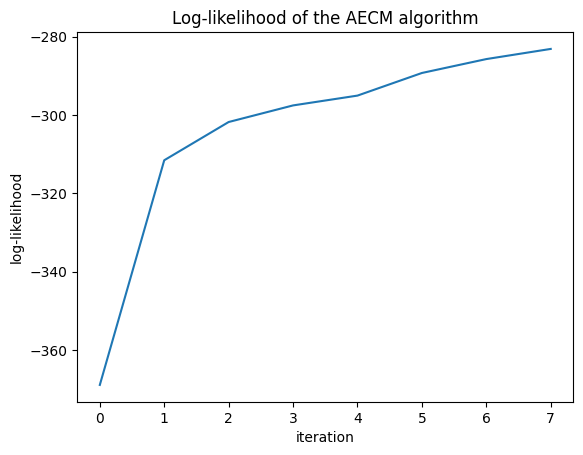

In [3]:
# Multivariate
n = 100
d = 3
n_clusters = 3
n_cat = 3

n_iter = 10
eps = 1e-1

m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (n_clusters, d))
true_pi = np.random.random((n_clusters, d))
true_alpha = np.ones(n_clusters) / n_clusters

data = generate_data(n, d, m, n_clusters, true_alpha, true_mu, true_pi, 0)

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)

clustering = OrdinalClustering(n_clusters, n_iter=n_iter, eps=eps, silent=False)

alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

labels = clustering.labels_

print(
    "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
        alpha_hat, mu_hat, pi_hat
    )
)

plt.plot(ll_list)
plt.ylabel("log-likelihood")
plt.xlabel("iteration")
plt.title("Log-likelihood of the AECM algorithm")
plt.show()

Cluster 0
True alpha: 0.3333333333333333
Estimated alpha: 0.19108912512712983
True mu: [1 3 3]
Estimated mu: [1 2 2]
True pi: [0.38280806 0.89538588 0.96779467]
Estimated pi: [0.88388875 0.4683148  0.84721237]
Cluster 1
True alpha: 0.3333333333333333
Estimated alpha: 0.286031449791152
True mu: [2 3 1]
Estimated mu: [1 3 3]
True pi: [0.5468849  0.27482357 0.59223042]
Estimated pi: [0.42079424 0.88261173 0.95124657]
Cluster 2
True alpha: 0.3333333333333333
Estimated alpha: 0.5228794250817184
True mu: [1 2 2]
Estimated mu: [2 3 1]
True pi: [0.89676116 0.40673335 0.55207828]
Estimated pi: [0.47434822 0.42743839 0.20006665]


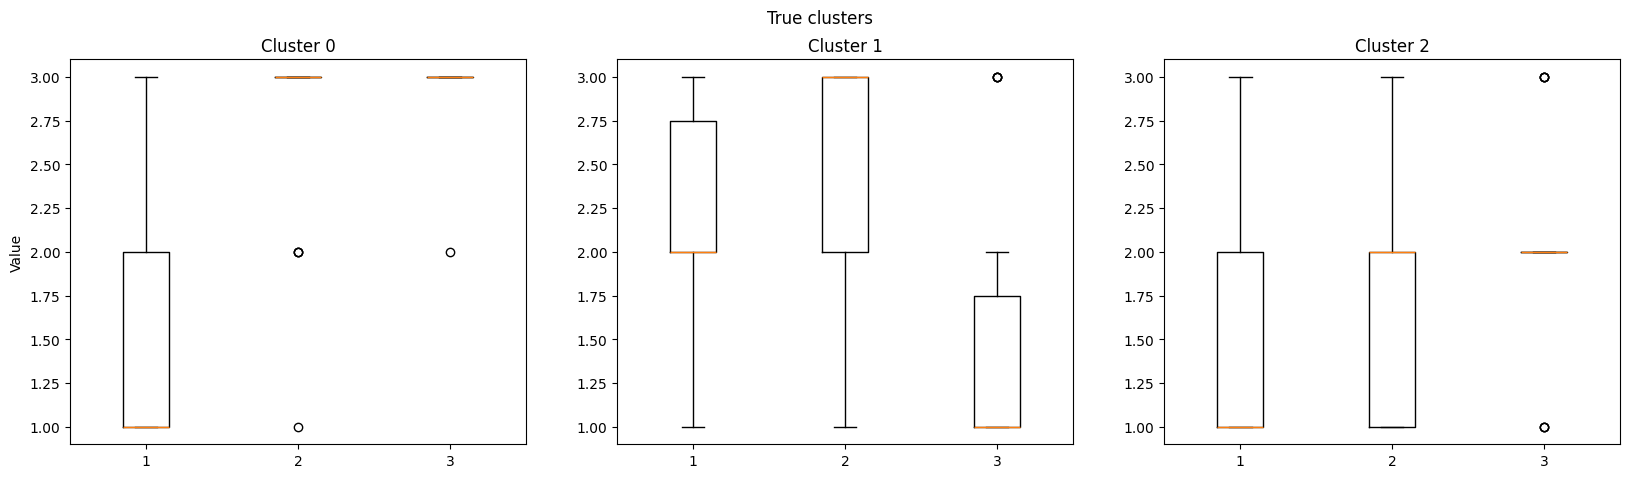

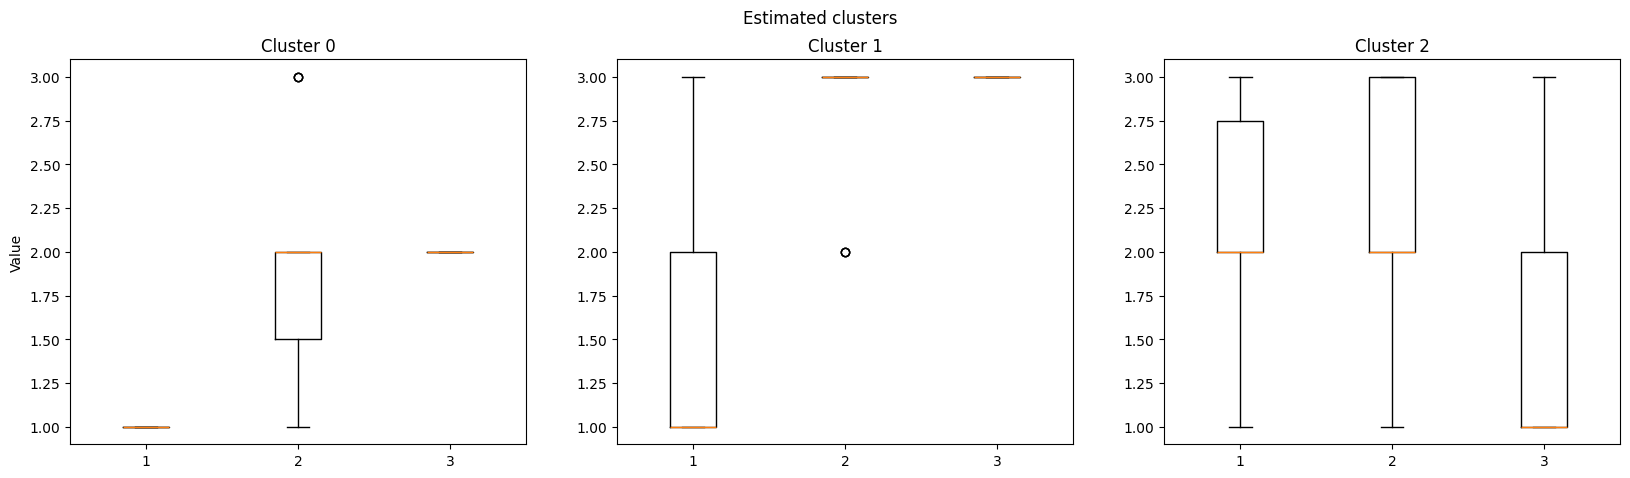

In [4]:
import pandas as pd

#box plots for each cluster:
figtrue, axtrue = plt.subplots(1, n_clusters, figsize=(20, 5))
figest, axest = plt.subplots(1, n_clusters, figsize=(20, 5))

for i in range(n_clusters):
    print("Cluster {}".format(i))
    print("True alpha: {}".format(true_alpha[i]))
    print("Estimated alpha: {}".format(alpha_hat[i]))
    print("True mu: {}".format(true_mu[i]))
    print("Estimated mu: {}".format(mu_hat[i]))
    print("True pi: {}".format(true_pi[i]))
    print("Estimated pi: {}".format(pi_hat[i]))
    axtrue[i].boxplot(data[0][data[1] == i, :])
    axtrue[i].set_title("Cluster {}".format(i))
    axest[i].boxplot(data[0][labels == i, :])
    axest[i].set_title("Cluster {}".format(i))
axest[0].set_ylabel("Value")
axtrue[0].set_ylabel("Value")
figtrue.suptitle("True clusters")
figest.suptitle("Estimated clusters")
plt.show()

In [5]:
# Experiments:
from collections import defaultdict
from src.utils import optimal_transport_matching

ns = [50, 250]
n_iter = 10

n_clusters = [3, 5]
d = [3, 5]
n_cats = [2, 3]

scores = defaultdict(list)

for n in ns:
    for nc in n_clusters:
        for dim in d:
            for ncats in n_cats:
                m = np.ones(dim).astype(int) * ncats
                np.random.seed(0)
                true_mu = np.random.randint(1, ncats + 1, (nc, dim))
                true_pi = np.random.random((nc, dim))
                true_alpha = np.random.random(nc)
                true_alpha = true_alpha / np.sum(true_alpha)

                data = generate_data(n, dim, m, nc, true_alpha, true_mu, true_pi, 0)

                clustering = OrdinalClustering(nc, n_iter=n_iter, eps=eps)

                alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

                labels = clustering.labels_
                ot_matching = optimal_transport_matching(labels, data[1], nc)

                alpha_hat = alpha_hat[list(ot_matching.values())]
                mu_hat = mu_hat[list(ot_matching.values()), :]
                pi_hat = pi_hat[list(ot_matching.values()), :]

                delta_alpha = np.linalg.norm(true_alpha - alpha_hat, ord=1)/dim
                delta_mu = np.linalg.norm(true_mu - mu_hat, ord=1)/(dim*ncats)
                delta_pi = np.linalg.norm(true_pi - pi_hat, ord=1)/(dim*ncats)

                scores["n"].append(n)
                scores["n_clusters"].append(nc)
                scores["d"].append(dim)
                scores["n_cats"].append(ncats)
                scores["ll"].append(ll_list[-1])
                scores["pi"].append(pi_hat)
                scores["mu"].append(mu_hat)
                scores["alpha"].append(alpha_hat)
                scores["delta_alpha"].append(delta_alpha)
                scores["delta_mu"].append(delta_mu)
                scores["delta_pi"].append(delta_pi)

scores = pd.DataFrame(scores)
scores.to_csv("../data/scores.csv", index=False)

In [6]:
scores_short = scores.drop(["pi", "mu", "alpha", "ll"], axis=1)
scores_short.columns = [
    "$n$",
    "$n_{clusters}$",
    "$d$",
    "$n_{cats}$",
    rf"$\Delta \alpha$",
    rf"$\Delta \mu$",
    rf"$\Delta \pi$",
]
scores_short = scores_short.groupby(["$n$", "$n_{clusters}$", "$d$", "$n_{cats}$"]).mean()
# scores_short = scores_short.transpose()

caption = "Results of the experiments for the AECM algorithm no synthethic data with the BOS distribution. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters."

print(scores_short.to_latex(caption=caption, float_format="%.3f",
                            label="tab:results", escape=False,
                            position="htbp",
                            multicolumn_format="c",
                            ))
scores_short

\begin{table}[htbp]
\caption{Results of the experiments for the AECM algorithm no synthethic data with the BOS distribution. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters.}
\label{tab:results}
\begin{tabular}{llllrrr}
\toprule
 &  &  &  & $\Delta \alpha$ & $\Delta \mu$ & $\Delta \pi$ \\
$n$ & $n_{clusters}$ & $d$ & $n_{cats}$ &  &  &  \\
\midrule
\multirow[t]{8}{*}{50} & \multirow[t]{4}{*}{3} & \multirow[t]{2}{*}{3} & 2 & 0.112 & 0.167 & 0.074 \\
 &  &  & 3 & 0.085 & 0.222 & 0.025 \\
\cline{3-7}
 &  & \multirow[t]{2}{*}{5} & 2 & 0.011 & 0.000 & 0.043 \\
 &  &  & 3 & 0.039 & 0.067 & 0.038 \\
\cline{2-7} \cline{3-7}
 & \multirow[t]{4}{*}{5} & \multirow[t]{2}{*}{3} & 2 & 0.058 & 0.167 & 0.081 \\
 &  &  & 3 & 0.073 & 0.111 & 0.079 \\
\cline{3

$\Delta \alpha$  $\Delta \mu$  $\Delta \pi$
$n$ $n_{clusters}$ $d$ $n_{cats}$                                             
50  3              3   2                  0.112016      0.166667      0.074210
                       3                  0.084667      0.222222      0.024672
                   5   2                  0.010559      0.000000      0.043012
                       3                  0.039356      0.066667      0.038114
    5              3   2                  0.057622      0.166667      0.081187
                       3                  0.072898      0.111111      0.078878
                   5   2                  0.095046      0.300000      0.130268
                       3                  0.068416      0.066667      0.116771
250 3              3   2                  0.095456      0.000000      0.035237
                       3                  0.017916      0.222222      0.007301
                   5   2                  0.031206      0.000000      0.016416
                       3                  0.017068      0.066667      0.018993
    5              3   2                  0.037203      0.166667      0.022196
                       3                  0.057108      0.222222      0.037003
                   5   2                  0.044444      0.000000      0.022431
                       3                  0.020310      0.066667      0.051966

## GOD Model

In [45]:
from src.god_model_generator import god_model_sample
from src.god_model_estimator import estimate_mu_pi_grid

n = 1000
m = 4
n_iter = 10000
eps = 1e-3

true_mu = np.random.randint(1, m + 1)
true_pi = (np.random.random() + 1) / 2

data = god_model_sample(m, true_mu, true_pi, n_sample=n, seed=0)

print("True mu: {}, True pi: {}".format(true_mu, true_pi))

mu_hat, pi_hat, ll = estimate_mu_pi_grid(m, data)

print(
    "Estimated mu: {}, Estimated pi: {}".format(
        mu_hat, pi_hat
    )
)

print(ll)

True mu: 2, True pi: 0.9849045338733744
Estimated mu: 2, Estimated pi: 0.9848484848484849
-176.22843359206487


/Users/aliramlaoui/Library/CloudStorage/GoogleDrive-ramlaouiali@gmail.com/My Drive/Cours 3A/PGM/project/Ordinal-data-clustering/notebooks/../src/god_model_estimator.py:184: RuntimeWarning: divide by zero encountered in log
  log_likelihood += np.log(evaluate_polynomial(p=u_mu[x - 1], x=t))


In [47]:
# Multivariate
n = 100
d = 3
n_clusters = 3
n_cat = 5

n_iter = 10
eps = 1e-3

m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (n_clusters, d))
true_pi = np.random.random((n_clusters, d))
true_alpha = np.ones(n_clusters) / n_clusters

data = generate_data(n, d, m, n_clusters, true_alpha, true_mu, true_pi, 0, model="god")

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)

clustering = OrdinalClustering(n_clusters, model="god", init="random", n_iter=n_iter, eps=eps, silent=False)

alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

labels = clustering.labels_

print(
    "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
        alpha_hat, mu_hat, pi_hat
    )
)

plt.plot(ll_list)
plt.ylabel("log-likelihood")
plt.xlabel("iteration")
plt.title("Log-likelihood of the AECM algorithm")
plt.show()

True alpha: [0.33333333 0.33333333 0.33333333], True mu: [[5 4 1]
 [4 1 3]
 [4 1 2]], True pi: [[0.46147936 0.78052918 0.11827443]
 [0.63992102 0.14335329 0.94466892]
 [0.52184832 0.41466194 0.26455561]]
Iteration 0
--------------------
Current mu: [[5 1 4]
 [4 4 2]
 [4 3 5]]
Current pi: [[0.29753461 0.05671298 0.27265629]
 [0.47766512 0.81216873 0.47997717]
 [0.3927848  0.83607876 0.33739616]]
Log-likelihood: -503.2307304075503

Iteration 1
--------------------
Current mu: [[1 5 3]
 [4 4 5]
 [5 3 4]]
Current pi: [[0.62121212 0.94444444 0.78282828]
 [0.57575758 0.75252525 0.75252525]
 [0.54545455 0.61616162 0.55050505]]
Log-likelihood: -436.182627095736

Iteration 2
--------------------
Current mu: [[1 5 3]
 [4 4 5]
 [5 1 4]]
Current pi: [[0.62626263 0.94949495 0.88888889]
 [0.57070707 0.74747475 0.79292929]
 [0.57070707 0.58585859 0.55050505]]
Log-likelihood: -430.0165339559846

Iteration 3
--------------------
Current mu: [[2 5 3]
 [4 4 5]
 [5 1 4]]
Current pi: [[0.64646465 0.9444444

Cluster 0
True alpha: 0.3333333333333333
Estimated alpha: 0.3409199252282583
True mu: [5 4 1]
Estimated mu: [4 5 3]
True pi: [0.46147936 0.78052918 0.11827443]
Estimated pi: [0.62626263 0.9040404  0.92929293]
Cluster 1
True alpha: 0.3333333333333333
Estimated alpha: 0.4734643115411659
True mu: [4 1 3]
Estimated mu: [2 4 5]
True pi: [0.63992102 0.14335329 0.94466892]
Estimated pi: [0.51515152 0.74242424 0.87373737]
Cluster 2
True alpha: 0.3333333333333333
Estimated alpha: 0.18561576323057585
True mu: [4 1 2]
Estimated mu: [2 3 5]
True pi: [0.52184832 0.41466194 0.26455561]
Estimated pi: [0.54040404 0.54040404 0.51515152]


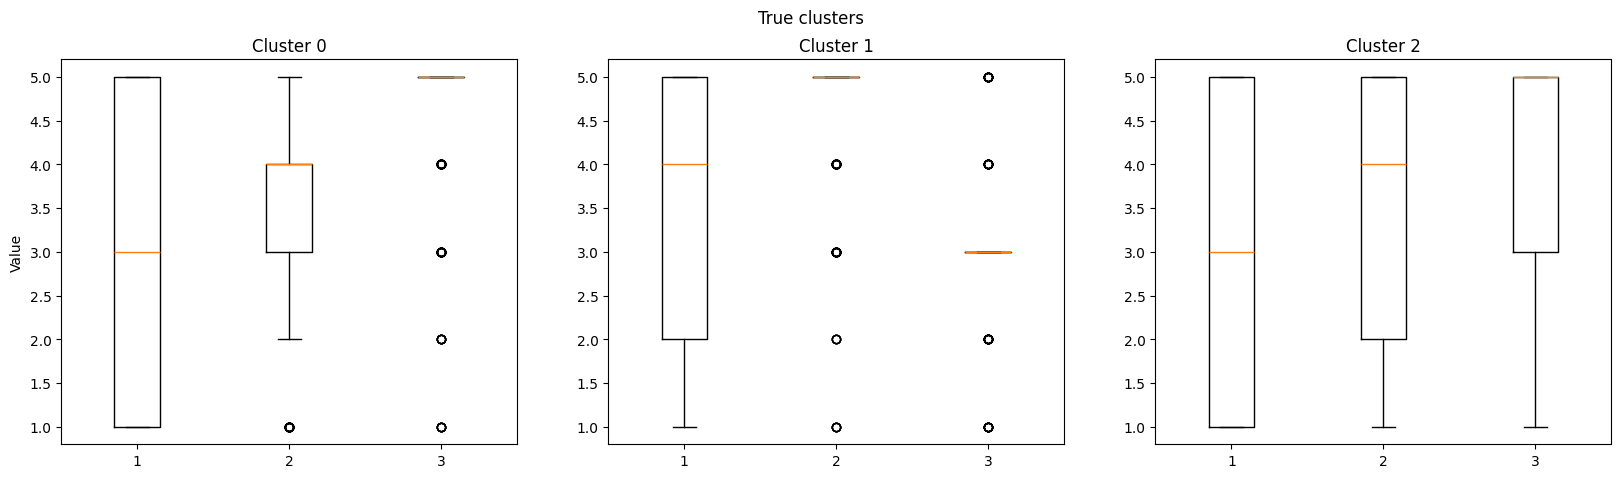

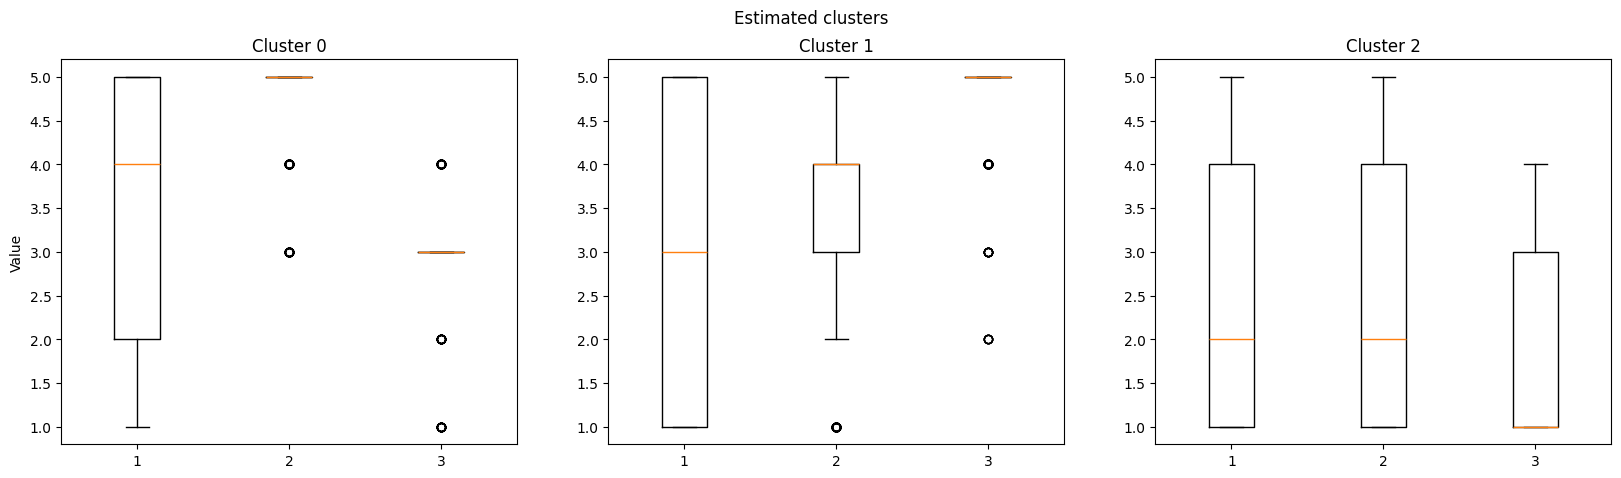

In [43]:
#box plots for each cluster:
figtrue, axtrue = plt.subplots(1, n_clusters, figsize=(20, 5))
figest, axest = plt.subplots(1, n_clusters, figsize=(20, 5))

for i in range(n_clusters):
    print("Cluster {}".format(i))
    print("True alpha: {}".format(true_alpha[i]))
    print("Estimated alpha: {}".format(alpha_hat[i]))
    print("True mu: {}".format(true_mu[i]))
    print("Estimated mu: {}".format(mu_hat[i]))
    print("True pi: {}".format(true_pi[i]))
    print("Estimated pi: {}".format(pi_hat[i]))
    axtrue[i].boxplot(data[0][data[1] == i, :])
    axtrue[i].set_title("Cluster {}".format(i))
    axest[i].boxplot(data[0][labels == i, :])
    axest[i].set_title("Cluster {}".format(i))
axest[0].set_ylabel("Value")
axtrue[0].set_ylabel("Value")
figtrue.suptitle("True clusters")
figest.suptitle("Estimated clusters")
plt.show()

In [44]:

# Experiments:
from collections import defaultdict
from src.utils import optimal_transport_matching

ns = [50, 250]
n_iter = 10

n_clusters = [3, 5]
d = [3, 5]
n_cats = [2, 3]

scores = defaultdict(list)

init = "random"

for n in ns:
    for nc in n_clusters:
        for dim in d:
            for ncats in n_cats:
                m = np.ones(dim).astype(int) * ncats
                np.random.seed(0)
                true_mu = np.random.randint(1, ncats + 1, (nc, dim))
                true_pi = np.random.random((nc, dim))
                true_alpha = np.random.random(nc)
                true_alpha = true_alpha / np.sum(true_alpha)

                data = generate_data(n, dim, m, nc, true_alpha, true_mu, true_pi, 0)

                clustering = OrdinalClustering(nc, model="god", init=init, n_iter=n_iter, eps=eps)

                alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

                labels = clustering.labels_
                ot_matching = optimal_transport_matching(labels, data[1], nc)

                alpha_hat = alpha_hat[list(ot_matching.values())]
                mu_hat = mu_hat[list(ot_matching.values()), :]
                pi_hat = pi_hat[list(ot_matching.values()), :]

                delta_alpha = np.linalg.norm(true_alpha - alpha_hat, ord=1)/dim
                delta_mu = np.linalg.norm(true_mu - mu_hat, ord=1)/(dim*ncats)
                delta_pi = np.linalg.norm(true_pi - pi_hat, ord=1)/(dim*ncats)

                scores["n"].append(n)
                scores["n_clusters"].append(nc)
                scores["d"].append(dim)
                scores["n_cats"].append(ncats)
                scores["ll"].append(ll_list[-1])
                scores["pi"].append(pi_hat)
                scores["mu"].append(mu_hat)
                scores["alpha"].append(alpha_hat)
                scores["delta_alpha"].append(delta_alpha)
                scores["delta_mu"].append(delta_mu)
                scores["delta_pi"].append(delta_pi)

scores = pd.DataFrame(scores)
scores.to_csv("../data/scores_god.csv", index=False)

/Users/aliramlaoui/Library/CloudStorage/GoogleDrive-ramlaouiali@gmail.com/My Drive/Cours 3A/PGM/project/Ordinal-data-clustering/notebooks/../tests/god_model_estimator.py:189: RuntimeWarning: divide by zero encountered in log
  log_likelihood += weights[i] * np.log(
